In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('C:\My Space\ML\Datasets\placement_2.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

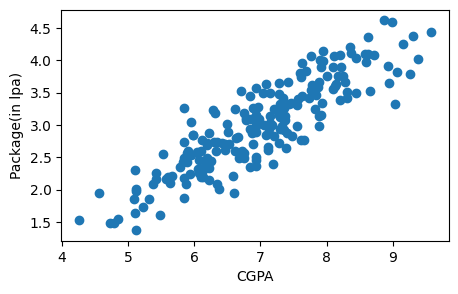

In [24]:
plt.figure(figsize=(5,3))
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

#### From Scratch using OLS

In [25]:
x = df.iloc[:,0].values
y = df.iloc[:,1].values

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
class SimpleLinearRegression:

    def __init__(self):
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        num = 0
        den = 0
        for i in range(X_train.shape[0]):
            num = num + ((X_train[i] - X_train.mean()) * (y_train[i]-y_train.mean()))
            den = den + ((X_train[i] - X_train.mean()) * (X_train[i]-X_train.mean()))
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)

    def predict(self, X_test):
        return self.m * X_test + self.b

In [28]:
lr = SimpleLinearRegression()
lr.fit(x_train, y_train)

0.5742564727019197
-1.0270069374542108


Text(0, 0.5, 'Package(in lpa)')

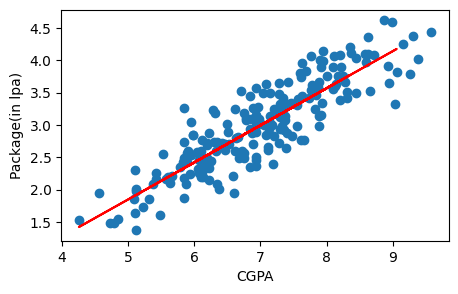

In [29]:
plt.figure(figsize=(5,3))
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_test,lr.predict(x_test),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [30]:
y_test[1], lr.predict(x_test)[1]

(np.float64(3.23), np.float64(3.136352489634707))

In [31]:
y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7730984312051673

#### Using Sklearn

In [32]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [33]:
y_train.shape

(160,)

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train ,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

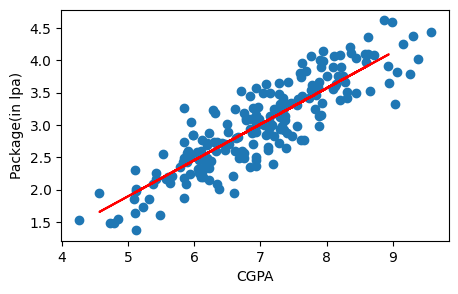

In [35]:
plt.figure(figsize=(5,3))
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_test,lr.predict(x_test),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [36]:
lr.intercept_

np.float64(-0.8961119222429144)

In [37]:
lr.coef_

array([0.55795197])

In [38]:
y_test.iloc[0], lr.predict(x_test.iloc[0].values.reshape(1,1))

c:\My Space\ML\MLvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(np.float64(4.1), array([3.89111601]))

In [39]:
y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.780730147510384